## Anscombe Dataset. A research.

### Francis John Anscombe

Francis John Anscombe (13 May 1918 – 17 October 2001)was an English statistician renowned for his works on randomisation, analysis of variance (Anscombre transform, used to stabilise Standard Deviation in Poisson distributions is named after him) and computer statistics.

### Anscombe dataset

This is a well-known data set, firstly 

The Anscombe data set consists of 4 different sets of (x,y) values, with esentially identical values for:

- mean of x
- variance of x
- mean of y
- variance of y
- correlation between x and y
- linear regression intercept and slope

Each dataset has a series of x values and dependent y values.

    x1  x2  x3  x4     y1    y2     y3     y4
0   10  10  10   8   8.04  9.14   7.46   6.58
1    8   8   8   8   6.95  8.14   6.77   5.76
2   13  13  13   8   7.58  8.74  12.74   7.71
3    9   9   9   8   8.81  8.77   7.11   8.84
4   11  11  11   8   8.33  9.26   7.81   8.47
5   14  14  14   8   9.96  8.10   8.84   7.04
6    6   6   6   8   7.24  6.13   6.08   5.25
7    4   4   4  19   4.26  3.10   5.39  12.50
8   12  12  12   8  10.84  9.13   8.15   5.56
9    7   7   7   8   4.82  7.26   6.42   7.91
10   5   5   5   8   5.68  4.74   5.73   6.89
              x1         x2         x3         x4         y1         y2  \
count  11.000000  11.000000  11.000000  11.000000  11.000000  11.000000   
mean    9.000000   9.000000   9.000000   9.000000   7.500909   7.500909   
std     3.316625   3.316625   3.316625   3.316625   2.031568   2.031657   
min     4.000000   4.000000   4.000000   8.000000   4.260000   3.100000   
25%     6.500000   6.500000   6.500000   8.000000   6.315000   6.695000  

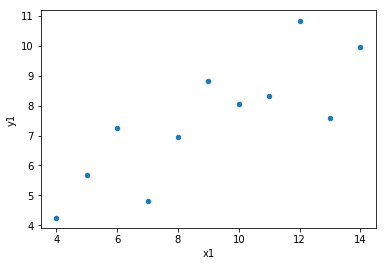

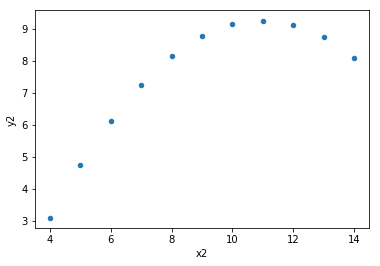

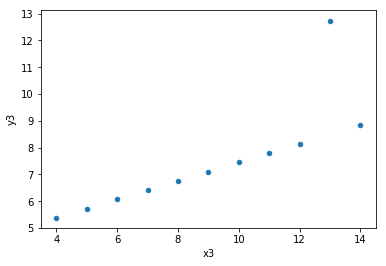

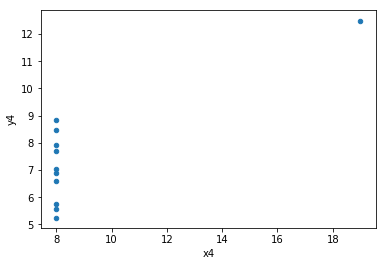

In [36]:
import matplotlib.pyplot as plt
import numpy as np


# Importing dataset from csv file using pandas
import pandas as pd
data = pd.read_csv("anscombe.csv")
print (data)

# Transforming dataset into DataFrame and describing its components
df = pd.DataFrame(data)
print (df.describe())

# Plotting the four series of data in a scatter plot
df.plot.scatter('x1','y1')
df.plot.scatter('x2','y2')
df.plot.scatter('x3','y3')
df.plot.scatter('x4','y4')
df.corr()

print (df.corr)

### Graphical Representation



In [ ]:
# Importing seaborn for plotting
import seaborn as sns
